In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from pathlib import Path as P
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
ls 数据集\基本数据

 驱动器 D 中的卷是 Data
 卷的序列号是 BE8C-D0EF

 D:\我的数据\研二上学期\华为杯\2022E\数据集\基本数据 的目录

2022/10/07  18:48    <DIR>          .
2022/10/07  18:48    <DIR>          ..
2022/10/07  10:01            36,864 1A764300
2022/10/06  10:40            59,024 地图.jfif
2022/10/06  10:40            36,352 附件1、锡林格勒草原概况.doc
2022/10/06  10:40            32,768 附件10、叶面积指数（LAI）2012-2022年.xls
2022/10/07  09:36            36,864 附件11、一些历史数据.xls
2022/10/07  18:48    <DIR>          附件2、锡林郭勒统计年鉴（2016-2021）
2022/10/06  10:40            39,936 附件3、土壤湿度2022—2012年.xls
2022/10/06  10:40            35,840 附件4、土壤蒸发量2012—2022年.xls
2022/10/07  18:48    <DIR>          附件5、绿植覆盖率（2020-2022）
2022/10/06  10:40            32,768 附件6、植被指数-NDVI2012-2022年.xls
2022/10/07  09:54            25,600 附件7、锡林郭勒土壤基本数据.xls
2022/10/07  18:48    <DIR>          附件8、锡林郭勒盟气候2012-2022
2022/10/06  10:40            15,798 附件9、径流量2012-2022年.xlsx
              10 个文件        351,814 字节
               5 个目录 245,485,903,872 可用字节


1. 附件3土壤湿度
2. 附件4土壤蒸发
3. 附件

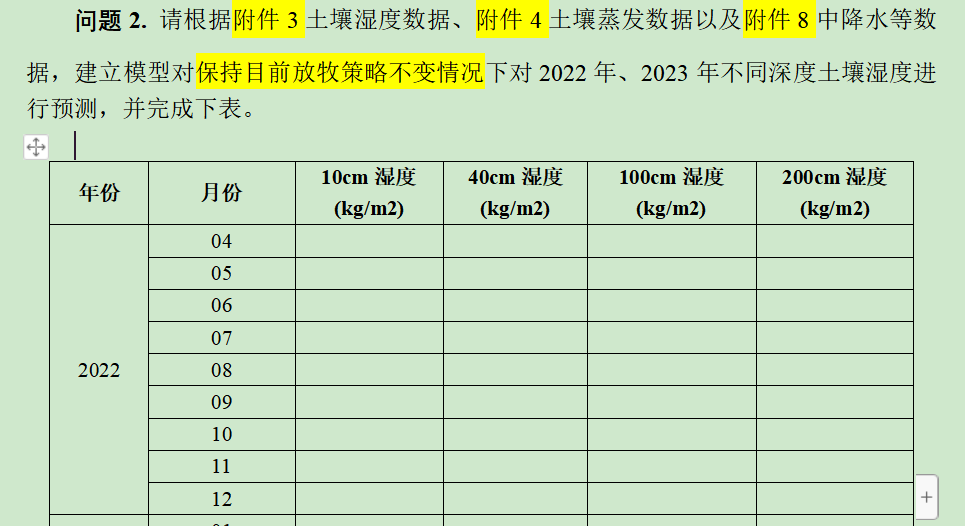

### 处理附件3：不同深度的土壤湿度数据

1. 剔除经纬度，因为都是一样的；
2. 把月份和年份合并为`pandas.DatetimeIndex`，然后剔除；
3. 数据中不存在空值，无须处理；

In [65]:
df =  pd.ExcelFile('./数据集/基本数据/附件3、土壤湿度2022—2012年.xls')
df = df.parse(0)
df

,月份,年份,经度(lon),纬度(lat),10cm湿度(kg/m2),40cm湿度(kg/m2),100cm湿度(kg/m2),200cm湿度(kg/m2)
0,1,2022,115.375,44.125,12.45,52.14,93.45,164.48
1,2,2022,115.375,44.125,12.10,52.14,93.45,164.48
2,3,2022,115.375,44.125,14.96,52.13,93.44,164.48
3,1,2021,115.375,44.125,15.17,50.40,82.44,165.92
4,2,2021,115.375,44.125,13.93,50.40,82.44,165.92
...,...,...,...,...,...,...,...,...
118,8,2012,115.375,44.125,15.76,44.94,61.25,168.44
119,9,2012,115.375,44.125,17.12,45.67,55.29,168.38
120,10,2012,115.375,44.125,15.04,42.49,54.69,168.33
121,11,2012,115.375,44.125,14.79,42.71,55.02,168.32


In [66]:
df.columns

Index(['月份', '年份', '经度(lon)', '纬度(lat)', '10cm湿度(kg/m2)', '40cm湿度(kg/m2)',
       '100cm湿度(kg/m2)', '200cm湿度(kg/m2)'],
      dtype='object')

In [67]:
YCOLS=[ '10cm湿度(kg/m2)', '40cm湿度(kg/m2)',
       '100cm湿度(kg/m2)', '200cm湿度(kg/m2)']
TIMECOLS=['month','year','day']

In [68]:
NAMEMAP={
    '月份': 'month', '年份': 'year', '10cm湿度(kg/m2)': '10cm湿度(kg/m2)', '40cm湿度(kg/m2)': '40cm湿度(kg/m2)',
       '100cm湿度(kg/m2)': '100cm湿度(kg/m2)', '200cm湿度(kg/m2)': '200cm湿度(kg/m2)'
}
COLS=list(NAMEMAP.values())
COLS

['month',
 'year',
 '10cm湿度(kg/m2)',
 '40cm湿度(kg/m2)',
 '100cm湿度(kg/m2)',
 '200cm湿度(kg/m2)']

In [69]:
def renameAndExtract(df: pd.DataFrame, map: dict)->pd.DataFrame:
    return df.rename(columns=map)[list(map.values())]


In [70]:
def yearMonthToDate(df: pd.DataFrame)->pd.DataFrame:
    TIMECOLS=['month','year','day']
    df['day']=1
    df['time']=pd.to_datetime(df[TIMECOLS])
    df=df.set_index('time').drop(columns=['day']).sort_index()
    return df

In [71]:
df=renameAndExtract(df, NAMEMAP)
df

,month,year,10cm湿度(kg/m2),40cm湿度(kg/m2),100cm湿度(kg/m2),200cm湿度(kg/m2)
0,1,2022,12.45,52.14,93.45,164.48
1,2,2022,12.10,52.14,93.45,164.48
2,3,2022,14.96,52.13,93.44,164.48
3,1,2021,15.17,50.40,82.44,165.92
4,2,2021,13.93,50.40,82.44,165.92
...,...,...,...,...,...,...
118,8,2012,15.76,44.94,61.25,168.44
119,9,2012,17.12,45.67,55.29,168.38
120,10,2012,15.04,42.49,54.69,168.33
121,11,2012,14.79,42.71,55.02,168.32


In [72]:
df=yearMonthToDate(df)
df

,month,year,10cm湿度(kg/m2),40cm湿度(kg/m2),100cm湿度(kg/m2),200cm湿度(kg/m2)
time,,,,,,
2012-01-01,1,2012,13.73,30.87,42.79,168.56
2012-02-01,2,2012,13.00,30.87,42.79,168.56
2012-03-01,3,2012,12.60,30.87,42.79,168.56
2012-04-01,4,2012,11.97,30.73,42.76,168.56
2012-05-01,5,2012,14.18,29.99,42.58,168.56
...,...,...,...,...,...,...
2021-11-01,11,2021,13.91,52.17,93.43,164.49
2021-12-01,12,2021,13.14,52.14,93.45,164.48
2022-01-01,1,2022,12.45,52.14,93.45,164.48


In [73]:
df.to_csv('./附件3-湿度-预处理.csv')

### 处理附件4：土壤蒸发量数据

处理过程和附件3基本相同。

In [74]:
df =  pd.ExcelFile('./数据集/基本数据/附件4、土壤蒸发量2012—2022年.xls')
df = df.parse(0)
# Soil evaporation
df.columns

Index(['月份', '年份', '经度(lon)', '纬度(lat)', '土壤蒸发量(W/m2)', '土壤蒸发量(mm)'], dtype='object')

In [75]:
YCOLS=['土壤蒸发量(W/m2)', '土壤蒸发量(mm)']

In [76]:
NAMEMAP={
    '月份': 'month', '年份': 'year', '土壤蒸发量(W/m2)': '土壤蒸发量(W/m2)', '土壤蒸发量(mm)': '土壤蒸发量(mm)'
}

In [77]:
df=renameAndExtract(df, NAMEMAP)
df

,month,year,土壤蒸发量(W/m2),土壤蒸发量(mm)
0,1,2022,0.41,0.44
1,2,2022,0.28,0.27
2,3,2022,5.58,5.98
3,1,2021,1.05,1.13
4,2,2021,1.58,1.53
...,...,...,...,...
118,8,2012,13.32,14.27
119,9,2012,12.88,13.36
120,10,2012,7.59,8.13
121,11,2012,0.88,0.92


In [78]:
df=yearMonthToDate(df)
df

,month,year,土壤蒸发量(W/m2),土壤蒸发量(mm)
time,,,,
2012-01-01,1,2012,0.57,0.61
2012-02-01,2,2012,0.86,0.86
2012-03-01,3,2012,1.78,1.91
2012-04-01,4,2012,6.94,7.20
2012-05-01,5,2012,16.89,18.10
...,...,...,...,...
2021-11-01,11,2021,1.39,1.44
2021-12-01,12,2021,0.87,0.93
2022-01-01,1,2022,0.41,0.44


In [79]:
fig=px.line(df, y=YCOLS)
fig.update_layout(xaxis_title='年份', yaxis_title='取值', title='附件4、土壤蒸发量2012—2022年', legend_title='土壤蒸发量单位')


In [80]:
df.to_csv('./附件4-土壤蒸发量-预处理.csv')

### 处理附件8：气候数据

1. 将不同年份的文件合并为一个DataFrame方便分析；
2. 删除只有一种取值的列：`['站点号', '海拔高度(m)', '经度', '纬度', '平均气温≥35℃的天数']`；
3. 删除空值过多的列（在127行中，只有33行为非空的那些列，意义不大），有：

`['积雪深度(mm)','平均最大瞬时风速(knots)','最大瞬时风速极值(knots)']`；


In [81]:
d=P('./数据集/基本数据/附件8、锡林郭勒盟气候2012-2022/')
file_list=list(d.rglob('*年.xls'))
file_list

[WindowsPath('数据集/基本数据/附件8、锡林郭勒盟气候2012-2022/2012年.xls'),
 WindowsPath('数据集/基本数据/附件8、锡林郭勒盟气候2012-2022/2013年.xls'),
 WindowsPath('数据集/基本数据/附件8、锡林郭勒盟气候2012-2022/2014年.xls'),
 WindowsPath('数据集/基本数据/附件8、锡林郭勒盟气候2012-2022/2015年.xls'),
 WindowsPath('数据集/基本数据/附件8、锡林郭勒盟气候2012-2022/2016年.xls'),
 WindowsPath('数据集/基本数据/附件8、锡林郭勒盟气候2012-2022/2017年.xls'),
 WindowsPath('数据集/基本数据/附件8、锡林郭勒盟气候2012-2022/2018年.xls'),
 WindowsPath('数据集/基本数据/附件8、锡林郭勒盟气候2012-2022/2019年.xls'),
 WindowsPath('数据集/基本数据/附件8、锡林郭勒盟气候2012-2022/2020年.xls'),
 WindowsPath('数据集/基本数据/附件8、锡林郭勒盟气候2012-2022/2021年.xls'),
 WindowsPath('数据集/基本数据/附件8、锡林郭勒盟气候2012-2022/2022年.xls')]

In [82]:
df_list=[pd.read_excel(f) for f in file_list]
df=pd.concat(df_list)
df

,站点号,海拔高度(m),经度,纬度,年份,月份,平均气温(℃),平均最高气温(℃),平均最低气温(℃),最高气温极值(℃),...,平均站点气压(hPa),积雪深度(mm),平均能见度(km),最小能见度(km),最大能见度(km),平均风速(knots),平均最大持续风速(knots),单日最大平均风速(knots),平均最大瞬时风速(knots),最大瞬时风速极值(knots)
0,54102099999,1004.0,115.375,44.125,2012,1,-22.94,-16.04,-29.35,-9.28,...,907.04,NaN,29.00,26.23,29.93,5.52,8.96,15.5,NaN,NaN
1,54102099999,1004.0,115.375,44.125,2012,2,-17.86,-10.76,-26.25,-0.72,...,903.99,NaN,29.32,26.23,29.93,6.01,11.12,15.5,NaN,NaN
2,54102099999,1004.0,115.375,44.125,2012,3,-7.11,-1.32,-14.78,15.39,...,902.44,NaN,28.28,15.61,29.93,7.36,12.60,27.2,NaN,NaN
3,54102099999,1004.0,115.375,44.125,2012,4,6.94,13.94,-1.94,26.22,...,898.30,NaN,28.21,14.81,29.93,8.82,15.09,25.3,NaN,NaN
4,54102099999,1004.0,115.375,44.125,2012,5,14.61,22.14,4.93,32.50,...,899.50,NaN,28.55,21.57,29.93,8.56,15.54,25.3,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,54102099999,1004.0,115.375,44.125,2022,3,-2.36,5.35,-11.22,15.22,...,899.03,20.32,27.44,18.67,29.93,6.37,11.16,19.4,23.33,37.3
3,54102099999,1004.0,115.375,44.125,2022,4,7.61,15.43,-2.66,28.22,...,898.98,NaN,27.94,16.25,29.93,7.41,12.69,21.4,26.32,32.6
4,54102099999,1004.0,115.375,44.125,2022,5,12.95,20.39,3.09,30.22,...,896.38,NaN,28.61,18.51,29.93,6.55,12.35,23.3,NaN,NaN
5,54102099999,1004.0,115.375,44.125,2022,6,19.59,26.74,11.75,34.11,...,892.42,NaN,27.10,17.86,29.93,5.87,10.50,19.4,NaN,NaN


In [83]:
df.columns

Index(['站点号', '海拔高度(m)', '经度', '纬度', '年份', '月份', '平均气温(℃)', '平均最高气温(℃)',
       '平均最低气温(℃)', '最高气温极值(℃)', '最低气温极值(℃)', '平均气温≥18℃的天数', '平均气温≥35℃的天数',
       '平均气温≤0℃的天数', '平均露点温度(℃)', '降水量(mm)', '最大单日降水量(mm)', '降水天数',
       '平均海平面气压(hPa)', '最低海平面气压(hPa)', '平均站点气压(hPa)', '积雪深度(mm)', '平均能见度(km)',
       '最小能见度(km)', '最大能见度(km)', '平均风速(knots)', '平均最大持续风速(knots)',
       '单日最大平均风速(knots)', '平均最大瞬时风速(knots)', '最大瞬时风速极值(knots)'],
      dtype='object')

In [84]:
# 删除只有一个值的列。
BAD_COLS=[col for col in df.columns if len(df[col].unique()) == 1]
BAD_COLS

['站点号', '海拔高度(m)', '经度', '纬度', '平均气温≥35℃的天数']

In [85]:
df=df.drop(columns=BAD_COLS)


In [86]:
df.info() # 有些列na太多，删掉。

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127 entries, 0 to 6
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   年份               127 non-null    int64  
 1   月份               127 non-null    int64  
 2   平均气温(℃)          127 non-null    float64
 3   平均最高气温(℃)        127 non-null    float64
 4   平均最低气温(℃)        127 non-null    float64
 5   最高气温极值(℃)        127 non-null    float64
 6   最低气温极值(℃)        127 non-null    float64
 7   平均气温≥18℃的天数      127 non-null    int64  
 8   平均气温≤0℃的天数       127 non-null    int64  
 9   平均露点温度(℃)        127 non-null    float64
 10  降水量(mm)          127 non-null    float64
 11  最大单日降水量(mm)      127 non-null    float64
 12  降水天数             127 non-null    int64  
 13  平均海平面气压(hPa)     127 non-null    float64
 14  最低海平面气压(hPa)     127 non-null    float64
 15  平均站点气压(hPa)      127 non-null    float64
 16  积雪深度(mm)         33 non-null     float64
 17  平均能见度(km)        1

In [87]:
BAD_COLS=['积雪深度(mm)','平均最大瞬时风速(knots)','最大瞬时风速极值(knots)']
df=df.drop(columns=BAD_COLS)
df.isna().any().any()

False

In [88]:
df.columns

Index(['年份', '月份', '平均气温(℃)', '平均最高气温(℃)', '平均最低气温(℃)', '最高气温极值(℃)',
       '最低气温极值(℃)', '平均气温≥18℃的天数', '平均气温≤0℃的天数', '平均露点温度(℃)', '降水量(mm)',
       '最大单日降水量(mm)', '降水天数', '平均海平面气压(hPa)', '最低海平面气压(hPa)', '平均站点气压(hPa)',
       '平均能见度(km)', '最小能见度(km)', '最大能见度(km)', '平均风速(knots)', '平均最大持续风速(knots)',
       '单日最大平均风速(knots)'],
      dtype='object')

In [89]:
df=df.rename(columns={'年份':'year', '月份': 'month'})
df.columns

Index(['year', 'month', '平均气温(℃)', '平均最高气温(℃)', '平均最低气温(℃)', '最高气温极值(℃)',
       '最低气温极值(℃)', '平均气温≥18℃的天数', '平均气温≤0℃的天数', '平均露点温度(℃)', '降水量(mm)',
       '最大单日降水量(mm)', '降水天数', '平均海平面气压(hPa)', '最低海平面气压(hPa)', '平均站点气压(hPa)',
       '平均能见度(km)', '最小能见度(km)', '最大能见度(km)', '平均风速(knots)', '平均最大持续风速(knots)',
       '单日最大平均风速(knots)'],
      dtype='object')

In [90]:
df=yearMonthToDate(df)

In [91]:
df.to_csv('附件8-气候-预处理.csv')